In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [5]:
df=pd.read_csv('data/stud.csv')

In [12]:
df.shape

(1000, 8)

In [6]:
X=df.drop('math_score',axis=1)
y=df['math_score']

In [8]:
num_feature=X.select_dtypes(exclude='object').columns
categorical_feature=X.select_dtypes(include='object').columns

In [9]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

encoder=OneHotEncoder()
scaler=StandardScaler()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",encoder,categorical_feature),
        ("Scaler",scaler,num_feature)
    ]
)

In [10]:
X=preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [14]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    score=r2_score(true,predicted)
    return mae,mse,rmse,score


In [15]:
models={
"Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
score=[]

for i in range(len(list(models.keys()))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    mae_train,mse_train,rmse_train,score_train = evaluate_model(y_train, y_train_pred)

    mae_test,mse_test,rmse_test,score_test= evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for Training set')
    print(f"Root Mean Square Error :{mse_train}")
    print(f"Mean Absolute Error: {mae_train}")
    print(f"Root Mean Squared Error: {rmse_train}")
    print(f"R2_score {score_train}")
    print('----------------------------------')
    
    print('Model performance for Training set')
    print(f"Root Mean Square Error :{mse_test}")
    print(f"Mean Absolute Error: {mae_test}")
    print(f"Root Mean Squared Error: {rmse_test}")
    print(f"R2_score {score_test}")
    score.append(score_test)


Linear Regression
Model performance for Training set
Root Mean Square Error :28.334870380648585
Mean Absolute Error: 4.266711846071957
Root Mean Squared Error: 5.323050852720513
R2_score 0.8743172040139593
----------------------------------
Model performance for Training set
Root Mean Square Error :29.095169866715494
Mean Absolute Error: 4.214763142474852
Root Mean Squared Error: 5.393993869732843
R2_score 0.8804332983749564
Lasso
Model performance for Training set
Root Mean Square Error :43.47840400585578
Mean Absolute Error: 5.206302661246526
Root Mean Squared Error: 6.593815587795565
R2_score 0.8071462015863458
----------------------------------
Model performance for Training set
Root Mean Square Error :42.50641683841163
Mean Absolute Error: 5.157881810347763
Root Mean Squared Error: 6.519694535667421
R2_score 0.8253197323627852
Ridge
Model performance for Training set
Root Mean Square Error :28.337788233082456
Mean Absolute Error: 4.264987823725977
Root Mean Squared Error: 5.323324

In [23]:
pd.DataFrame(list(zip(model_list,score)),columns=['model','r2_score'])

,model,r2_score
0,Linear Regression,0.880433
1,Lasso,0.825320
2,Ridge,0.880593
3,K-Neighbors Regressor,0.783681
4,Decision Tree,0.729944
5,Random Forest Regressor,0.852000
6,XGBRegressor,0.827797
7,AdaBoost Regressor,0.845434


In [ ]:
#Linear_model training
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score=r2_score(y_test,y_pred)
print(f"Accuracy of the model is {score}")

Accuracy of the model is 0.8804332983749564


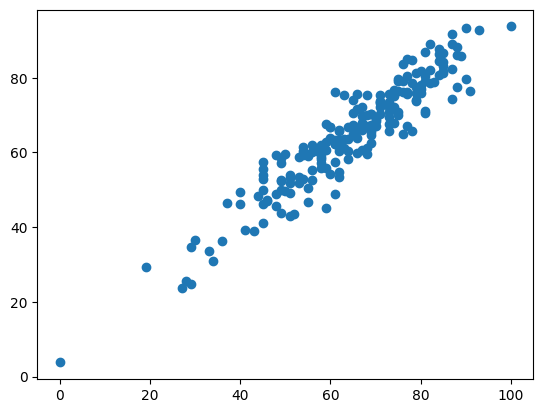

In [25]:
plt.scatter(y_test,y_pred)

In [28]:
# Random forest training
forest= RandomForestRegressor()
forest.fit(X_train,y_train)
forest_pred=forest.predict(X_test)

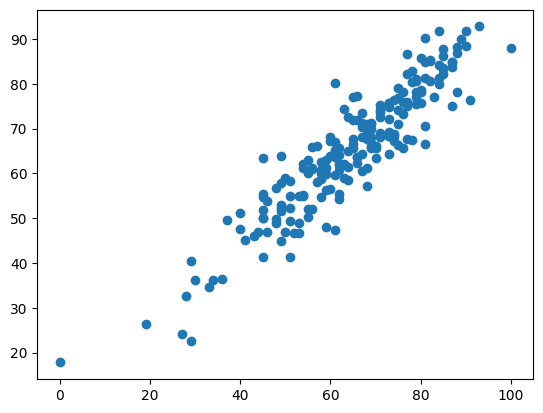

In [27]:
plt.scatter(y_test,forest_pred)